<img src="../img/viu_logo.png" width="200">

## 01MIAR - Actividad Video Valenbici

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas 3 y 4, así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Las entregas sólo serán validas si se realizan a través del site de la asignatura: Actividades, Actividad Video.

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Entrega
- Convocatoria 1 - 03/06/2022
- Convocatoria 2 - 05/09/2022

#### Descripción
El conjunto de datos "estaciones_bici.csv" (fichero disponible en carpeta videos/res en drive) proviene de una descarga de datos del servicio web de la empresa municipal Valenbici, dedicada al alquiler de bicicletas en Valencia.

Los datos recabados de este servicio web son de mediciones cada 15 minutos de cada una de las estaciones disponibles:

http://www.valenbisi.es/service/carto/json

Cada estación está compuesta por un número variable de bornetas (total) donde se pueden anclar las bicicletas. Los datos obtenidos de cada estación (registros) refleja el número de bornetas libres (free) y el número de bicicletas disponibles (available).

http://www.valenbisi.es/service/stationdetails/valence/[número de estación]

#### Columnas para trabajar:
- station: id de la estación
- total: número total de bornetas
- download_date: timestamp de la descarga de datos
- available: número de bicis disponibles

#### Actividad
- 01 - Carga de datos de csv (estaciones_bici.csv) en un DataFrame
- 02 - Obtención del número de estaciones que tienen un total de 30 bornetas
- 03 - Número de estación con la media más alta de bicis disponibles
- 04 - Realizar el histograma de bicis disponibles de la estación del punto anterior
- 05 - Realizar gráfica con  la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

In [1]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

### 01 - Carga de datos de csv (estaciones_bici.csv) en un DataFrame

In [2]:
# Cargamos los datos de csv y lo mostramos
ruta = os.path.join("videos", "res", "estaciones_bici.csv")
stations_dataset = pd.read_csv(ruta, sep=';', index_col=0, engine="python")
display(stations_dataset)

,_id,available,connected,download_date,station,free,open,ticket,total,updated
0,5c6050a42554172704fccdc0,9,1,2019-02-10 17:25:37.787,64,11,1,0,20,2019-02-10 17:21:13.000
1,5c6050a42554172704fccdc1,6,1,2019-02-10 17:25:37.787,73,14,1,1,20,2019-02-10 17:24:13.000
2,5c605be225541729b7d50885,20,1,2019-02-10 18:13:39.827,63,0,1,1,20,2019-02-10 18:09:16.000
3,5c605be225541729b7d50886,6,1,2019-02-10 18:13:39.827,64,14,1,0,20,2019-02-10 18:12:15.000
4,5c605be225541729b7d50887,9,1,2019-02-10 18:13:39.827,65,10,1,1,19,2019-02-10 18:09:16.000
...,...,...,...,...,...,...,...,...,...,...
27542,5c61face25541729b7d57419,0,1,2019-02-11 23:44:00.786,260,20,1,0,20,2019-02-11 23:42:16.000
27543,5c61face25541729b7d5741a,15,1,2019-02-11 23:44:00.786,261,4,1,0,19,2019-02-11 23:39:16.000
27544,5c61face25541729b7d5741b,1,1,2019-02-11 23:44:00.786,268,9,1,1,10,2019-02-11 23:42:16.000
27545,5c61face25541729b7d5741c,1,1,2019-02-11 23:44:00.786,269,14,1,0,15,2019-02-11 23:39:16.000


### 02 - Obtención del número de estaciones que tienen un total de 30 bornetas

In [3]:
# Filtramos por un total de 30 bornetas
stations_30bornetas = stations_dataset[stations_dataset['total'] == 30]
#display(mask)

# Evitamos las estaciones repetidas con un set
print(f"Existen {len(set(stations_30bornetas['station']))} estaciones con un total de 30 bornetas")
print(f"Las estaciones son las siguientes: {set(stations_30bornetas['station'])}")


Existen 11 estaciones con un total de 30 bornetas
Las estaciones son las siguientes: {226, 101, 105, 110, 143, 111, 114, 117, 246, 89, 189}


### 03 - Número de estación con la media más alta de bicis disponibles

In [4]:
# Obtener lista de valores de estaciones y bicis disponibles
list_stations = list(stations_dataset['station'])
list_available = list(stations_dataset['available'])


# Crear un diccionario de listas --> estacion: [numero de bicis]
dict_stations_available = {}
for i, station in enumerate(list_stations):
    if station not in dict_stations_available:
        dict_stations_available[station] = []
    
    dict_stations_available[station].append(list_available[i])  
#print(dict_stations_available)


# Obtener la media de bicis de cada estacion
f_mean = lambda value: np.mean(value)
dict_stations_available_mean = {key:(f_mean(np.array(value))) for key, value in dict_stations_available.items()}
#print(dict_stations_available_mean)


# Obtener la estacion con la media más alta
station_max = max(dict_stations_available_mean, key=dict_stations_available_mean.get) 
print(f"La estación {station_max} tiene la media más alta de {dict_stations_available_mean[station_max]} bicis disponibles")


La estación 50 tiene la media más alta de 31.26 bicis disponibles


### 04 - Realizar el histograma de bicis disponibles de la estación del punto anterior

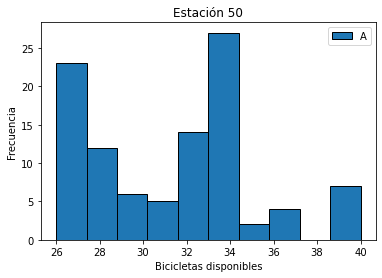

In [5]:
# Obtenemos las bicis disponibles en esa estacion y creamos su dataframe
x_data = range(0, len(dict_stations_available[station_max]))
df_available_station = pd.DataFrame(dict_stations_available[station_max], columns=list('A'))

# Creamos el histograma
ax = df_available_station.plot(kind='hist', title='Estación 50', edgecolor='black')
ax.set_xlabel("Bicicletas disponibles")
ax.set_ylabel("Frecuencia")
plt.show()

### 05 - Realizar gráfica con la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

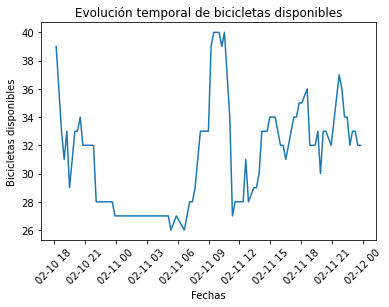

In [6]:
import datetime as dt

# Obtener la columna de download_date de la estacion 50
list_dates = (stations_dataset[stations_dataset['station'] == 50]['download_date']).astype("datetime64")

# Dibujar la gráfica
fig,axis = plt.subplots(1,1)
axis.plot(list_dates,df_available_station)
axis.set_title("Evolución temporal de bicicletas disponibles")
axis.set_xlabel("Fechas")
axis.set_ylabel("Bicicletas disponibles")
plt.xticks(rotation=45)
plt.show() 